# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

#convert UNIX time to String 
from datetime import datetime  

# Import My API key  
from api_keys import api_key
#api_key = "c812965f3b858aaacfcb1d520a8d9fa5"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#check city/country by latitude & longitude
ciudad = citipy.nearest_city(37.56, 126.97)
print(ciudad.city_name+" in "+ciudad.country_code)

seoul in kr


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#call API : https://samples.openweathermap.org/data/2.5/weather?q=London&appid=b6907d289e10d714a6e88b30761fae22 
url = "https://api.openweathermap.org/data/2.5/weather?q="

#one sample
#cities = ["London"]

# inicialize values
urlstr=""
num = 1 
num_set = 1 

a1 = []
b1 = []
c1 = []
d1 = []
e1 = []
f1 = []
g1 = []
h1 = []
i1 = []

#Colums = {"City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"}


print("Beginning Data Retrieval")
print("------------------------")


#get API's value from cities
for x in cities: 
    urlstr = url + x + '&appid=' + api_key

    response = requests.get(urlstr)
    city_data = response.json()
    
    #checker : 
    #print(urlstr)
    #response.url 
    #response.status
    
    #check if there is a result
    codigo = int(city_data["cod"])
    if codigo < 300:
        
        city_data = response.json()
        
        #add to lists
        a1.append(city_data["name"])                #City
        b1.append(city_data["clouds"]["all"])       #Cloudiness
        c1.append(city_data["sys"]["country"])      #Country
        d1.append(city_data["dt"])                  #Date
        e1.append(city_data["main"]["humidity"])    #Humidity
        f1.append(city_data["coord"]["lat"])        #Lat
        g1.append(city_data["coord"]["lon"])        #Lng
        h1.append(city_data["main"]["temp_max"])    #Max Temp
        i1.append(city_data["wind"]["speed"])       #Wind Speed
        j = city_data["id"]                  #City Id = City number        

#display json
#print(json.dumps(city_data, indent=4, sort_keys=True))

        print("Processing Record "+ str(num) +" of Set "+str(num_set)+" | "+city_data["name"]+" id= "+str(j))
        num = num + 1
        if num == 51:
            num = 1
            num_set = num_set+1
    else:
        print("City not found. Skipping... - "+x)

print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | Ushuaia id= 3833367
Processing Record 2 of Set 1 | La Rioja id= 3848950
Processing Record 3 of Set 1 | Tomatlan id= 3981391
Processing Record 4 of Set 1 | Manacor id= 2514216
Processing Record 5 of Set 1 | Port Alfred id= 964432
Processing Record 6 of Set 1 | Rikitea id= 4030556
Processing Record 7 of Set 1 | Nagato id= 1899102
Processing Record 8 of Set 1 | Rocha id= 3440777
Processing Record 9 of Set 1 | Kapaa id= 5848280
Processing Record 10 of Set 1 | Kodiak id= 4407665
City not found. Skipping... - lolua
Processing Record 11 of Set 1 | Bonthe id= 2409914
Processing Record 12 of Set 1 | Jamestown id= 2069194
Processing Record 13 of Set 1 | Hilo id= 5855927
Processing Record 14 of Set 1 | Mandera id= 187896
Processing Record 15 of Set 1 | Solano id= 3667868
Processing Record 16 of Set 1 | Hermanus id= 3366880
Processing Record 17 of Set 1 | Fort Nelson id= 5955902
Processing Record 18 of Set 1 | Puerto 

Processing Record 42 of Set 3 | Le Port id= 3036965
Processing Record 43 of Set 3 | Deer Lake id= 5937252
Processing Record 44 of Set 3 | Tuktoyaktuk id= 6170031
City not found. Skipping... - manzil jamil
Processing Record 45 of Set 3 | Barrow id= 3833859
Processing Record 46 of Set 3 | Saint George id= 262462
Processing Record 47 of Set 3 | Sitka id= 4267710
Processing Record 48 of Set 3 | Nikolskoye id= 546105
Processing Record 49 of Set 3 | Vanderhoof id= 6173361
Processing Record 50 of Set 3 | Provideniya id= 4031574
Processing Record 1 of Set 4 | Borovskoy id= 1525121
Processing Record 2 of Set 4 | Algiers id= 4335045
Processing Record 3 of Set 4 | Bambous Virieux id= 1106677
Processing Record 4 of Set 4 | Batemans Bay id= 2176639
Processing Record 5 of Set 4 | Bredasdorp id= 1015776
Processing Record 6 of Set 4 | Buraydah id= 107304
Processing Record 7 of Set 4 | Novokayakent id= 518764
Processing Record 8 of Set 4 | San Patricio id= 3437029
Processing Record 9 of Set 4 | Saint-G

Processing Record 35 of Set 6 | Kahului id= 5847411
Processing Record 36 of Set 6 | Rio Grande id= 3451138
Processing Record 37 of Set 6 | Fortuna id= 5563839
Processing Record 38 of Set 6 | Plover id= 5267537
Processing Record 39 of Set 6 | Port Elizabeth id= 4501427
Processing Record 40 of Set 6 | Kumluca id= 305681
City not found. Skipping... - marcona
Processing Record 41 of Set 6 | Palmer id= 2067070
Processing Record 42 of Set 6 | Divo id= 2289887
Processing Record 43 of Set 6 | Lata id= 1253628
Processing Record 44 of Set 6 | Smithers id= 6149996
Processing Record 45 of Set 6 | Tari id= 2322495
Processing Record 46 of Set 6 | Cidreira id= 3466165
Processing Record 47 of Set 6 | Neiafu id= 4032420
Processing Record 48 of Set 6 | Dunedin id= 2191562
City not found. Skipping... - stornoway
Processing Record 49 of Set 6 | Gizo id= 6693679
Processing Record 50 of Set 6 | Chabahar id= 1161724
City not found. Skipping... - mys shmidta
Processing Record 1 of Set 7 | Ponta do Sol id= 345

Processing Record 29 of Set 9 | Chernyshevskiy id= 2025456
Processing Record 30 of Set 9 | Evanston id= 4891382
City not found. Skipping... - aflu
Processing Record 31 of Set 9 | Wyndham id= 2639447
Processing Record 32 of Set 9 | Hualmay id= 3939761
Processing Record 33 of Set 9 | Kidal id= 2455290
Processing Record 34 of Set 9 | Narsaq id= 3421719
Processing Record 35 of Set 9 | Sandwick id= 2640416
Processing Record 36 of Set 9 | Armidale id= 2177671
City not found. Skipping... - bolungarvik
Processing Record 37 of Set 9 | Niquero id= 3545981
Processing Record 38 of Set 9 | Arlit id= 2447513
City not found. Skipping... - shcherbynivka
Processing Record 39 of Set 9 | Awbari id= 2219235
Processing Record 40 of Set 9 | Suez id= 359796
Processing Record 41 of Set 9 | San Policarpo id= 1688696
Processing Record 42 of Set 9 | Touros id= 3386213
Processing Record 43 of Set 9 | Pamplona id= 3114472
Processing Record 44 of Set 9 | Kangaatsiaq id= 3422683
Processing Record 45 of Set 9 | Namib

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create DataFrame
weather_data = {"City":a1,"Cloudiness":b1,"Country":c1,"Date":d1,"Humidity":e1,"Lat":f1,"Lng":g1,"Max Temp":h1,"Wind Speed":i1}
weather_data = pd.DataFrame(weather_data)

In [6]:
#Export the city data into a .csv
weather_data.to_csv(output_data_file, sep='\t', encoding='utf-8')

In [7]:
#display the DataFrame
weather_data.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [8]:
#calculate time
ts = weather_data["Date"].max()
maxDate = datetime.utcfromtimestamp(ts).strftime('%m/%d/%y')
maxDate

'09/08/19'

In [9]:
ts = weather_data["Date"].min()
minDate = datetime.utcfromtimestamp(ts).strftime('%m/%d/%y')
minDate

'09/08/19'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

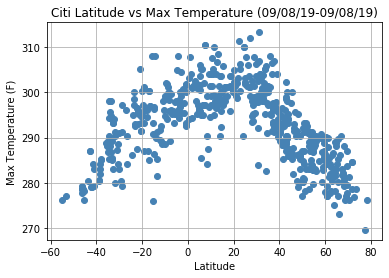

In [10]:
#weather_data.plot(kind='scatter',x='Lat',y='Max Temp',color='blue')
#plt.show()

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", color='steelblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Max Temperature ("+minDate+"-"+maxDate+")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

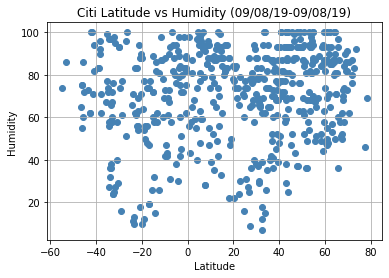

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", color='steelblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Humidity ("+minDate+"-"+maxDate+")")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

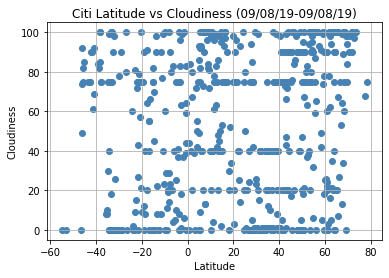

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", color='steelblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Cloudiness ("+minDate+"-"+maxDate+")")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

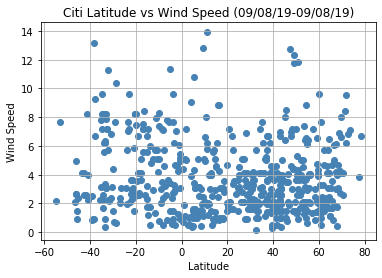

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", color='steelblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Wind Speed ("+minDate+"-"+maxDate+")")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Wind Speed.png")

# Show plot
plt.show()